In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm

from spatgame import evolve, evolve_old
from meangame import MeanGamePy as MeanGame
from game import GameField as SelfGame

In [2]:
plt.style.use("seaborn-whitegrid")

In this game $L^2$ individual "*players*" placed in a two-dimensional spatial array.

Every individual can play one of two tactics: cooperate($\mathcal{C}$) or defect($\mathcal{D}$). At the beginning of the "game", each player has the probability of being assigned $\mathcal{C}$ with probability $p_c$ and tactics $\mathcal{D}$ otherwise.

In each round individuals "*play the game*" with 8 its neighbors and the *average cooperator*. Tables of payoffs shown below

Table: Payoffs for games with neighbors.

| payoffs | $\mathcal{D}$ | $\mathcal{C}$ |
| --------- |:-------------:|----:|
| $\mathcal{D}$ | 0 | 0 |
| $\mathcal{C}$ | $b$ | 1 |

Table: Payoffs for games with *average cooperator*

| payoffs | $\mathcal{D}$ | $\mathcal{C}$ |
| --------- |:-------------:|----:|
| $\mathcal{D}$ | 0 | 0 |
| $\mathcal{C}$ | $b f_c$ | $f_c$ |

After playing all games the site occupied either by its original owner or by one of the neighbors who scores the highest total payoff in that round.

In [3]:
Ls = [20, 50, 100, 200]
bs = np.linspace(.9, 2, 60)

seeds = [5,58,4785,45895,1256,65478,854,126,42,1458,458,96324,985423,85456, 4585, 8956, 8596589,89589,74,658,84,845,9,55,489, 32,456,345,876,6, 457, 34,67,444,666, 5678, 98, 65, 389, 8765]
p_c = .9 # probability of being assigned strategy C

In [20]:
for L in Ls:
    for idx, seed in enumerate(seeds):
        np.random.seed(seed)
        np.save("fields/field_{}_{}.npy".format(L, idx), np.random.choice((0, 1), (L, L), p=(1-p_c, p_c)))

<IPython.core.display.Javascript object>


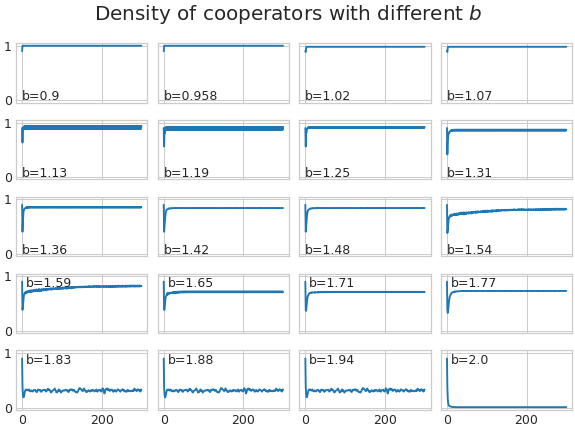

100%|██████████| 20/20 [00:14<00:00,  1.31it/s]


In [7]:
fig, axs = plt.subplots(5, 4, constrained_layout=True, sharex=True, sharey=True)
fig.suptitle('Density of cooperators with different $b$', fontsize=16)
for i, b in tqdm(enumerate(np.linspace(.9, 2, 20)), total=20):
    for n in [29]:
        field = np.load("fields/field_100_{}.npy".format(n))
        d = [field.sum()/(1.*field.shape[0]**2)]
        for _ in range(int(300)):
            field = evolve_old(field, b, 1)
            d.append(field.sum()/(1.*field.shape[0]**2))
        axs[i//4, i % 4].plot(d)
        if i > 11:
            axs[i//4, i % 4].text(10, 0.8, "b={:.3}".format(b, fontsize=11))
        else:
            axs[i//4, i % 4].text(0, 0, "b={:.3}".format(b, fontsize=11))

plt.show()

In [7]:
fig.savefig("figures/f_c_for_different_b.jpg", dpi=300, quality=95)

<IPython.core.display.Javascript object>


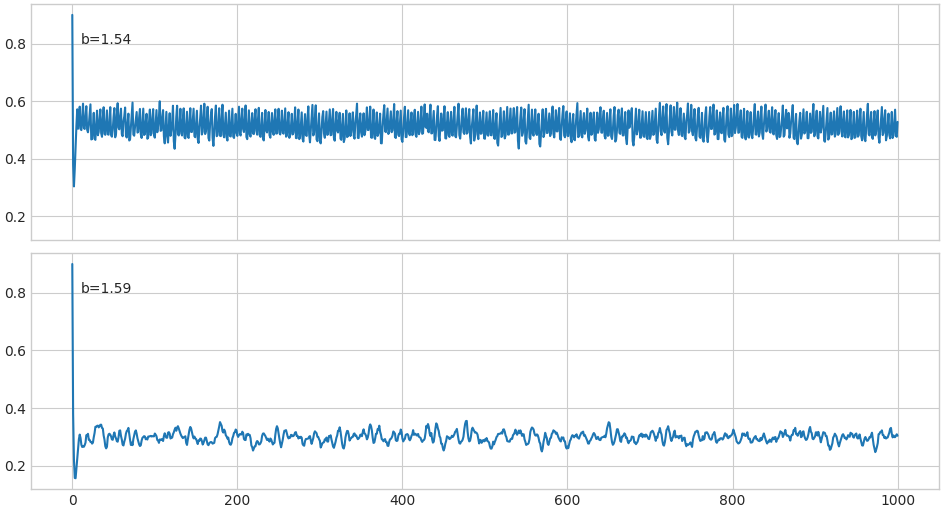

In [13]:
fig, axs = plt.subplots(2, 1, constrained_layout=True, sharex=True, sharey=True)
for i, b in enumerate([1.54, 1.59]):
    for n in [29]:
        field = np.load("fields/field_100_{}.npy".format(n))
        d = [field.sum()/(1.*field.shape[0]**2)]
        for _ in range(int(1000)):
            field = evolve(field, b, 1)
            d.append(field.sum()/(1.*field.shape[0]**2))
        axs[i].plot(d)
        axs[i].text(10, 0.8, "b={:.3}".format(b, fontsize=11))

As shown in figure above density of the cooperators become stable after 100 steps for all $b$ and oscilates with different frequency and amplitude around mean values.

In [4]:
DROP = 10000
CALC = 18*10**3
EVERY = 1
L = 100

## Transition values(local)

The game is defined by the payoff $b$ and different behaviour is expected at different $b$

To find the values of $b$ at which transition occurs we have to understand at which values the total outcome of agent may change.


<img src="./neighbourhoods.png" alt="drawing" width="300"/>

By looking at picture above we can come up with this formuls for $b$
$$b=\frac{n_{c\;shared}+n_c+f_c}{n_{c\;shared}+n_d+f_c+1}$$
for left hand side configurations

$$b=\frac{n_{c\;shared}+n_c+f_c}{n_{c\;shared}+n_d+f_c}$$
for right hand side configurations

Where

$n_{c\;shared}$ - number of cooperators($\mathcal{C}$) from red region

$n_c$ - number of cooperators near cooperator(purple region)

$n_d$ - number of cooperators near defector(yellow region)

$f_c$ - density of cooperators

In [5]:
def with_agents(f_c, n_share, n_c, n_d):
    return (n_share+n_c+f_c)/(n_share+n_d+f_c+1)

def without_agents(f_c, n_share, n_c, n_d):
    return (n_share+n_c+f_c)/(n_share+n_d+f_c)

def trans_val(f_c, a, b):
    return (a+f_c)/(b+f_c)

def with_agents_old(n_share, n_c, n_d):
    return (n_share+n_c+1)/(n_share+n_d+1)

def without_agents_old(n_share, n_c, n_d):
    return (n_share+n_c+1)/(n_share+n_d)

In [6]:
f_cs = np.linspace(0, 1, 20)

In [7]:
all_transitions = []
old_transitions = []
for n_allowed in [[1, 2, 3], [1, 2, 3, 4, 5]]:
    for n_share in range(7-len(n_allowed)):
        for n_c in n_allowed:
            for n_d in n_allowed:
                all_transitions.append(with_agents(f_cs, n_share, n_c, n_d))
                old_transitions.append(with_agents_old(n_share, n_c, n_d))
                
for n_allowed in [[1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7]]:
    for n_share in range(8-len(n_allowed)):
        for n_c in n_allowed:
            for n_d in n_allowed:
                all_transitions.append(without_agents(f_cs, n_share, n_c, n_d))
                old_transitions.append(without_agents_old(n_share, n_c, n_d))

In [8]:
all_transitions = []
for a in range(0, 9):
    for b in range(0, 9):
        if b == 0:
            all_transitions.append(trans_val(np.linspace(0.00000001, 1, 20), a, b))
        else:
            all_transitions.append(trans_val(f_cs, a, b))

In [9]:
transitions = []
for i, tr in enumerate(all_transitions[:-1]):
    if not (np.square(np.array(all_transitions[i+1:]) - tr).sum(-1) < 0.0000001).any():
        transitions.append(tr)
transitions.append(all_transitions[-1])

transitions_old = []
for i, tr in enumerate(old_transitions[:-1]):
    if not (np.square(np.array(old_transitions[i+1:]) - tr) < 0.0000001).any():
        transitions_old.append(tr)
transitions_old.append(old_transitions[-1])

Values of transitions for the game with itself were taken from the article "The spatial dilemmas of evolution" by A. Novak and M. May, 1993

## Let's collect data...

In [10]:
for b_trans in transitions_old:
    if (np.square(bs - b_trans) < .0000001).any():
        bs[np.square(bs - b_trans) < .0000001] -= .005

We will begin from game described in the article "The spatial dilemmas of evolution"

In [11]:
density = []
for b in tqdm(bs):
    den = []
    field = SelfGame(L, b)
    for i in range(len(seeds)):
        d = []
        field.field = 1-np.load("fields/field_{}_{}.npy".format(L, i))
        field.evolveQ(DROP)
        for _ in range(0, CALC-DROP, EVERY):
            field.evolveQ(1)
            d.append(1-field.field.sum()/(1.*L*L))
        den.append(d)
    density.append(den)
    
np.save("data/density_of_cooperators_old_game.npy", np.asarray(density))

 22%|██▏       | 13/60 [2:51:25<11:26:53, 876.88s/it]

KeyboardInterrupt: 

And moves to the game that was described above

In [ ]:
game = MeanGame(L, 1.6)
density = []
for b in tqdm(bs):
    den = []
    game.b = b
    for i in range(len(seeds)):
        d = []
        game.field = np.load("fields/field_{}_{}.npy".format(L, i) )
        game.evolve(CALC//2)
        game.evolve(CALC - CALC//2)
        den.append(game.densities[DROP::EVERY].tolist())
    density.append(den)
    
np.save("data/density_of_cooperators5.npy", np.asarray(density))

 12%|█▏        | 7/60 [2:25:33<19:12:24, 1304.62s/it]

## then cook and serve it

In [11]:
def mean_without_zeros(realizations):
    means = []
    for r in realizations:
        if r.mean() > .000001:
            means.append(r.mean())
    if len(means) == 0:
        return 0, 0
    else:
        return np.asarray(means).mean(), np.asarray(means).std()

density_old_raw = np.load("data/density_of_cooperators_old_game.npy")
density_new_raw = np.load("data/density_of_cooperators.npy")
density_new_5_raw = np.load("data/density_of_cooperators5.npy")

density_old = density_old_raw.mean(axis=-1)
density_new = density_new_raw.mean(axis=-1)
density_new_5 = density_new_5_raw.mean(axis=-1)

std_o = density_old.std(axis=-1)
std_n = density_new.std(axis=-1)
std_n_5 = density_new_5.std(axis=-1)

means_o = density_old.mean(axis=-1)
means_n = density_new.mean(axis=-1)
means_n_5 = density_new_5.mean(axis=-1)

In [12]:
density_old_raw = np.load("data/density_of_cooperators_old_game.npy")
density_new_raw = np.load("data/density_of_cooperators.npy")
density_new_5_raw = np.load("data/density_of_cooperators5.npy")

density_old = density_old_raw.mean(axis=-1)
density_new = density_new_raw.mean(axis=-1)
density_new_5 = density_new_5_raw.mean(axis=-1)

means_o, std_o = [], []
std_n, std_n_5 = [], []
means_n, means_n_5 = [], []

for br in density_old:
    m, d = mean_without_zeros(br)
    means_o.append(m)
    std_o.append(d)

for br in density_new:
    m, d = mean_without_zeros(br)
    means_n.append(m)
    std_n.append(d)
    
for br in density_new_5:
    m, d = mean_without_zeros(br)
    means_n_5.append(m)
    std_n_5.append(d)
    
means_o = np.asarray(means_o)
std_o = np.asarray(std_o)
std_n = np.asarray(std_n)
std_n_5 = np.asarray(std_n_5)
means_n = np.asarray(means_n)
means_n_5 = np.asarray(means_n_5)

## Let's see what we got

<IPython.core.display.Javascript object>


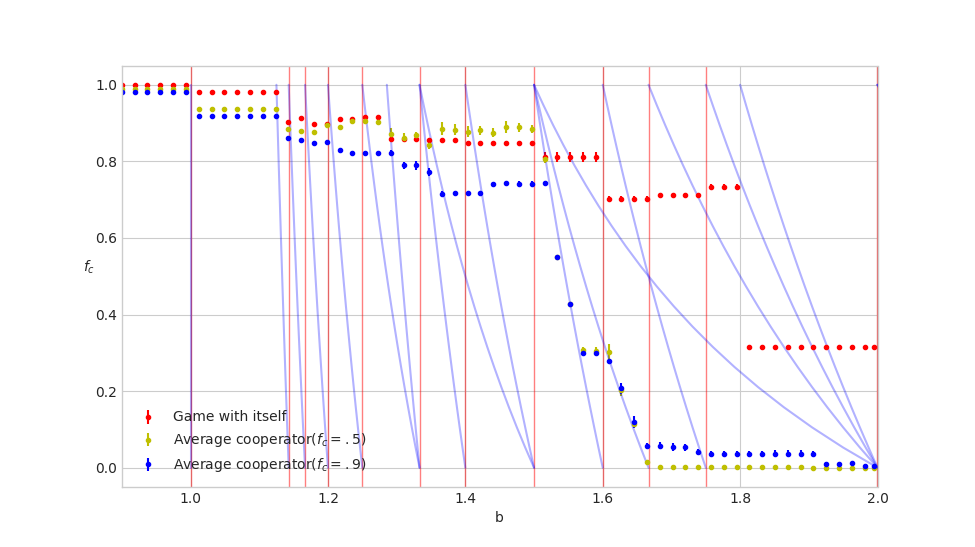

Text(0, 0.5, '$f_c$')

In [13]:
# fig = plt.figure()
plt.xlim(.9, 2)
# plt.suptitle('Средняя плотность кооператоров от $b$', fontsize=16)
plt.errorbar(bs, means_o, yerr=std_o, fmt=".r", label="Game with itself")
plt.errorbar(bs, means_n_5, yerr=std_n_5, fmt=".y", label="Average cooperator($f_c=.5$)")
plt.errorbar(bs, means_n, yerr=std_n, fmt=".b", label="Average cooperator($f_c=.9$)")
plt.legend(loc="lower left")
plt.xlabel("b")

for x in transitions_old: #[9/8, 8/7, 7/6, 6/5, 5/4, 9/7, 8/6, 7/5, 6/4, 8/5, 5/3, 7/4, 9/5, 2]:
    plt.axvline(x=x, linewidth=1, color='r', alpha=.5)

for x in transitions:
    plt.plot(x, f_cs, '-b', alpha=.3) #, label="For game with average")

# plt.plot((8+f_cs)/(5+f_cs), f_cs, '-b', alpha=.3)
plt.ylabel("$f_c$", rotation=0)

## Zooming into [1.5, 1.7]

In [5]:
np.linspace(1.5, 1.7, 30)

array([1.5       , 1.50689655, 1.5137931 , 1.52068966, 1.52758621,
       1.53448276, 1.54137931, 1.54827586, 1.55517241, 1.56206897,
       1.56896552, 1.57586207, 1.58275862, 1.58965517, 1.59655172,
       1.60344828, 1.61034483, 1.61724138, 1.62413793, 1.63103448,
       1.63793103, 1.64482759, 1.65172414, 1.65862069, 1.66551724,
       1.67241379, 1.67931034, 1.6862069 , 1.69310345, 1.7       ])

In [10]:
game = MeanGame(L, 1.6)
density2 = []
for b in tqdm(np.linspace(1.5, 1.7, 30)):
    den = []
    game.b = b
    for i in range(len(seeds)):
        d = []
        game.field = np.load("fields/field_{}_{}.npy".format(L, i) )
        game.evolve(CALC//2)
        game.evolve(CALC - CALC//2)
        den.append(game.densities[DROP::EVERY].tolist())
    density2.append(den)
    
np.save("data/density_of_cooperators15-17.npy", np.asarray(density2))

100%|██████████| 30/30 [5:22:10<00:00, 652.41s/it]  


In [14]:
density2 = np.load("data/density_of_cooperators15-17.npy")
density52 = np.load("data/density_of_cooperators515-17.npy")

In [15]:
density_new_wide = density2.mean(axis=-1)
density_new_5_wide = density52.mean(axis=-1)

std_n_w = density_new_wide.std(axis=-1)
std_n_5_w = density_new_5_wide.std(axis=-1)

means_n_w = density_new_wide.mean(axis=-1)
means_n_5_w = density_new_5_wide.mean(axis=-1)

In [16]:
density_new_wide = density2.mean(axis=-1)
density_new_5_wide = density52.mean(axis=-1)

std_n_w, std_n_5_w = [], []
means_n_w, means_n_5_w = [], []

for br in density_new_wide:
    m, d = mean_without_zeros(br)
    means_n_w.append(m)
    std_n_w.append(d)
    
for br in density_new_5_wide:
    m, d = mean_without_zeros(br)
    means_n_5_w.append(m)
    std_n_5_w.append(d)

<IPython.core.display.Javascript object>


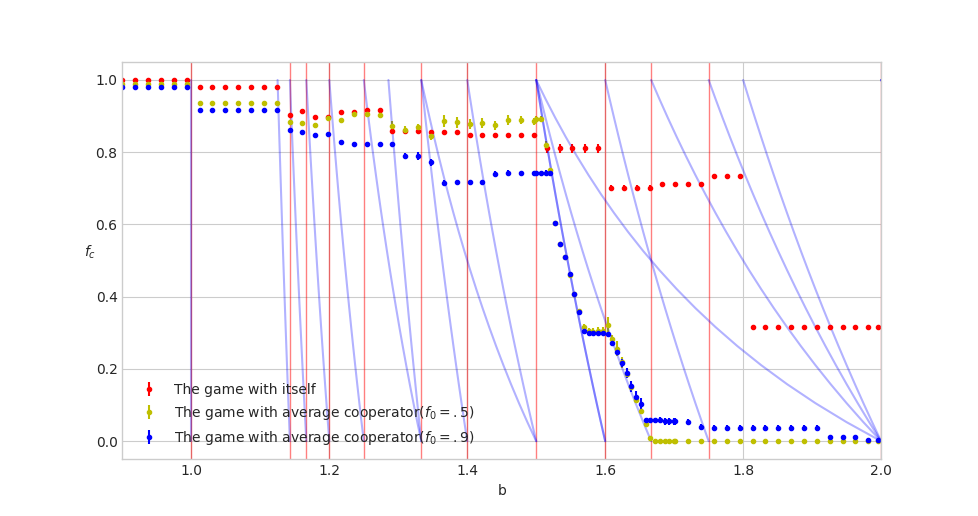

Text(0, 0.5, '$f_c$')

In [17]:
# fig = plt.figure()
plt.xlim(.9, 2)
# plt.suptitle('Средняя плотность кооператоров от $b$', fontsize=16)
plt.errorbar(bs, means_o, yerr=std_o, fmt=".r", label="The game with itself")

plt.errorbar(bs[bs < 1.50001], means_n_5[bs < 1.50001], yerr=std_n_5[bs < 1.50001], fmt=".y", label="The game with average cooperator($f_0=.5$)")
plt.errorbar(bs[bs > 1.6999], means_n_5[bs > 1.6999], yerr=std_n_5[bs > 1.6999], fmt=".y")
plt.errorbar(np.linspace(1.5, 1.7, 30), means_n_5_w, yerr=std_n_5_w, fmt=".y")

plt.errorbar(bs[bs < 1.50001], means_n[bs < 1.50001], yerr=std_n[bs < 1.50001], fmt=".b", label="The game with average cooperator($f_0=.9$)")
plt.errorbar(bs[bs > 1.6999], means_n[bs > 1.6999], yerr=std_n[bs > 1.6999], fmt=".b")
plt.errorbar(np.linspace(1.5, 1.7, 30), means_n_w, yerr=std_n_w, fmt=".b")

plt.legend(loc="lower left")
plt.xlabel("b")

for x in transitions_old: #[9/8, 8/7, 7/6, 6/5, 5/4, 9/7, 8/6, 7/5, 6/4, 8/5, 5/3, 7/4, 9/5, 2]:
    plt.axvline(x=x, linewidth=1, color='r', alpha=.5)

for x in transitions:
    plt.plot(x, f_cs, '-b', alpha=.3) #, label="For game with average")

plt.plot((8+f_cs)/(5+f_cs), f_cs, '-b', alpha=.3)
plt.ylabel("$f_c$", rotation=0)

In [28]:
plt.savefig("figures/cooperators_density_at_different_b", dpi=500, quality=95)

<IPython.core.display.Javascript object>


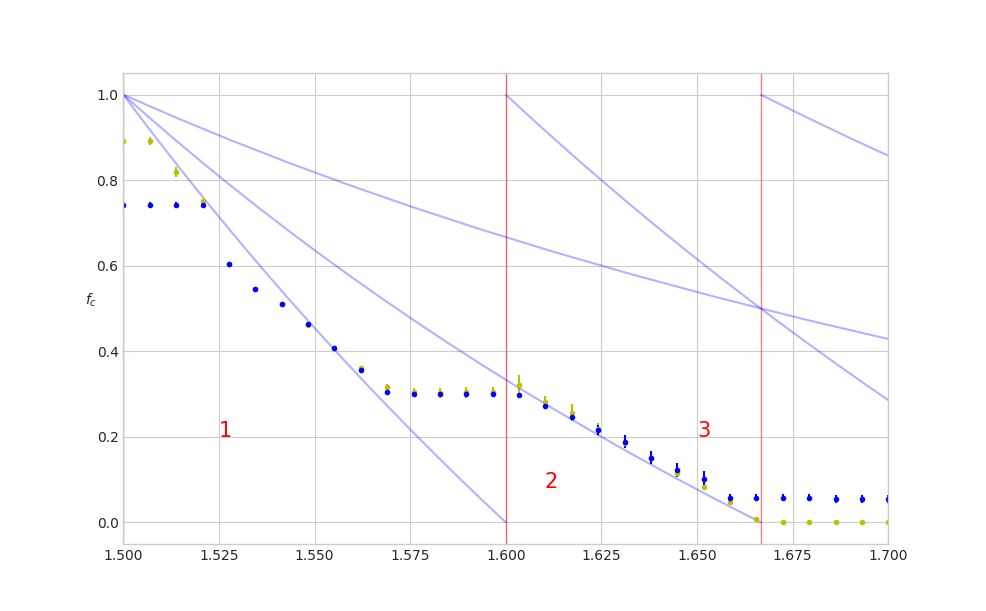

Text(0, 0.5, '$f_c$')

In [22]:
plt.xlim(1.5, 1.7)
plt.errorbar(np.linspace(1.5, 1.7, 30), means_n_5_w, yerr=std_n_5_w, fmt=".y", label="The game with average cooperator($f_0=.5$)")
plt.errorbar(np.linspace(1.5, 1.7, 30), means_n_w, yerr=std_n_w, fmt=".b", label="The game with average cooperator")
for x in transitions_old: #[9/8, 8/7, 7/6, 6/5, 5/4, 9/7, 8/6, 7/5, 6/4, 8/5, 5/3, 7/4, 9/5, 2]:
    plt.axvline(x=x, linewidth=1, color='r', alpha=.5)

for x in transitions:
    plt.plot(x, f_cs, '-b', alpha=.3) #, label="For game with average")
# plt.plot((8+f_cs)/(5+f_cs), f_cs, '-b', alpha=.3)
plt.text(1.525, 0.2, "1", color='red', fontsize=15)
plt.text(1.61, 0.08, "2", color='red', fontsize=15)
plt.text(1.65, 0.2,  "3", color='red', fontsize=15)
plt.ylabel("$f_c$", rotation=0)

In [31]:
plt.savefig("figures/cooperators_density_at_different_b_wide", dpi=500, quality=95)

### Possible explanation of the behaviour near 1.575-1.6

Let's define an "optimal density" at a given b as the average frequency of cooperators at which it fluctuates or ceases change.

The "optimal density" in region can be defined as optimal density of cooperators if we remove effect of region boundaries.

So what's happening with density at interval \[1.52,1.57\] and \[1.61,1.66\]?

As it can be see from the graph above, the "optimal density" in region 1 is higher than in region 2 where it's higher than in region 3.

When b is taken from interval \[1.52,1.57\] any field configuration with density from region 2, 3 or above would decreased till it fall under hyperbola and occure in region 1, where it will start to grow and one more time will cross hyperbola and cycle would repeat and density will fluctuate around line.

The same happens on interval \[1.61,1.66\].

Why the optimal density is similar to densities in the game by Novak-May at b > 1.8 is an open question.

## Initial condition on transitional line

In [73]:
BN = (5+np.arange(1, L**2, 200)/L**2)/(3+np.arange(1, L**2, 200)/L**2)

In [134]:
density2 = []
i = 0
for b, n in tqdm(zip(BN, np.arange(1, L**2, 200))):
    d = []
#     np.random.seed = 100
    field = np.asarray([1]*n+[0]*(L**2-n))
    np.random.shuffle(field)
    field = field.reshape((L, L))
    d.append(field.sum()/(1.*field.shape[0]*field.shape[1]))
    for _ in range(0, 100, 4):
        field = evolve(field, b, 4)
        d.append(field.sum()/(1.*field.shape[0]*field.shape[1]))
    density2.append(d)
    
# np.save("data/density_of_cooperators.npy", np.asarray(density))




0it [00:00, ?it/s]


1it [00:00,  3.42it/s]


2it [00:00,  3.44it/s]


3it [00:00,  3.46it/s]


4it [00:01,  3.31it/s]


5it [00:01,  3.41it/s]


6it [00:01,  3.52it/s]


7it [00:01,  3.61it/s]


8it [00:02,  3.74it/s]


9it [00:02,  3.77it/s]


10it [00:02,  3.78it/s]


11it [00:03,  3.72it/s]


12it [00:03,  3.68it/s]


13it [00:03,  3.62it/s]


14it [00:03,  3.61it/s]


15it [00:04,  3.70it/s]


16it [00:04,  3.74it/s]


17it [00:04,  3.80it/s]


18it [00:04,  3.83it/s]


19it [00:05,  3.87it/s]


20it [00:05,  3.87it/s]


21it [00:05,  3.86it/s]


22it [00:05,  3.89it/s]


23it [00:06,  3.76it/s]


24it [00:06,  3.71it/s]


25it [00:06,  3.69it/s]


26it [00:07,  3.70it/s]


27it [00:07,  3.79it/s]


28it [00:07,  3.80it/s]


29it [00:07,  3.80it/s]


30it [00:08,  3.88it/s]


31it [00:08,  3.89it/s]


32it [00:08,  3.93it/s]


33it [00:08,  4.00it/s]


34it [00:09,  3.86it/s]


35it [00:09,  3.73it/s]


36it [00:09,  3.73it/s]


37it [00:09,  3.80it/s]


38it [00:10,  3.91it/s]

<IPython.core.display.Javascript object>


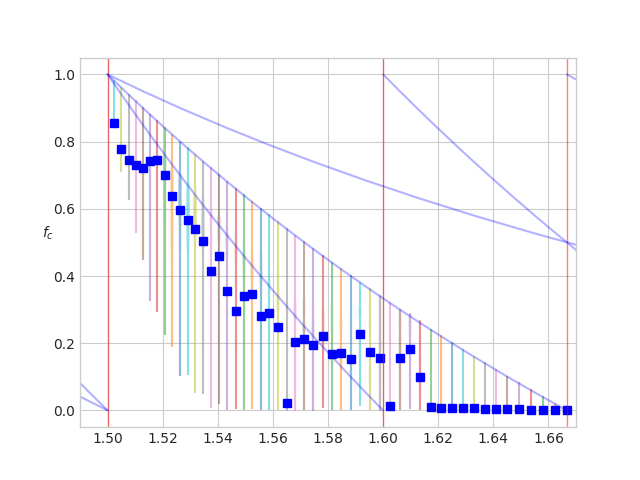

Text(0, 0.5, '$f_c$')

In [135]:
plt.xlim(1.49, 1.67)
for i, b in enumerate(BN):
    plt.plot([b]*26, density2[i],  alpha = .5)
    plt.plot(b, np.mean(density2[i]), "bs")


for x in transitions_old: #[9/8, 8/7, 7/6, 6/5, 5/4, 9/7, 8/6, 7/5, 6/4, 8/5, 5/3, 7/4, 9/5, 2]:
    plt.axvline(x=x, linewidth=1, color='r', alpha=.5)

for x in transitions:
    plt.plot(x, f_cs, '-b', alpha=.3) #, label="For game with average")
    
plt.plot((8+f_cs)/(5+f_cs), f_cs, '-b', alpha=.3)

plt.ylabel("$f_c$", rotation=0)

## Checking if density dependents on the initial density

In [10]:
game = MeanGame(L, 1.6)

In [11]:
density = []
for p_c in [.7, .5, .3]:
    den_inter = [] 
    for b in tqdm(bs):
        den = []
        for seed in seeds[:25]:
            np.random.seed(seed)
            game.b = b
            game.field = np.random.choice((0, 1), (L, L), p=(1-p_c, p_c))
            game.evolve(CALC//2)
            game.evolve(CALC - CALC//2)
            den.append(game.densities[DROP::EVERY].tolist())
            
        den_inter.append(den)
    density.append(den_inter)
    
np.save("data/density_of_cooperators.7.5.3.npy", np.asarray(density))

100%|██████████| 60/60 [6:43:28<00:00, 396.86s/it]  


In [13]:
den

[]

In [10]:
density_9_raw = np.load("data/density_of_cooperators.npy")[:, :20, :1500]
density_all_raw = np.load("data/density_of_cooperators.7.5.3.npy")

In [15]:
density_all_raw = np.concatenate((density_9_raw.reshape((1, 60, 20, 1500)), density_all_raw))

In [16]:
density_all_raw.shape

(5, 60, 20, 1500)

In [11]:
density_new = density_all_raw.mean(axis=-1)

std = density_new.std(axis=-1)

means = density_new.mean(axis=-1)

<IPython.core.display.Javascript object>


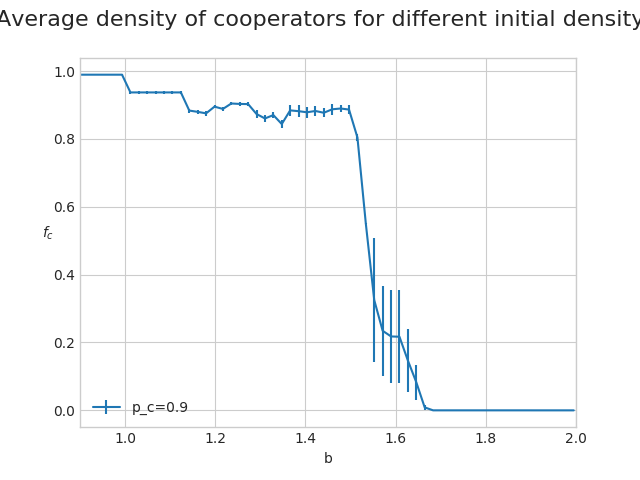

Text(0, 0.5, '$f_c$')

In [12]:
# fig = plt.figure()
plt.xlim(.9, 2)
plt.suptitle('Average density of cooperators for different initial density', fontsize=16)
# for i, p_c in enumerate([.7, .5, .3]):
#     plt.errorbar(bs, means[i], yerr=std[i], label="p_c={}".format(p_c))
plt.errorbar(bs, means[1], yerr=std[1], label="p_c={}".format(p_c))
plt.legend(loc="lower left")
plt.xlabel("b")

# for x in transitions:
#     plt.plot(x, f_cs, '-b', alpha=.3) #, label="For game with average")

# plt.plot((8+f_cs)/(5+f_cs), f_cs, '-b', alpha=.3)
plt.ylabel("$f_c$", rotation=0)

In [32]:
plt.savefig("figures/cooperators_density_for_diff_initial.png", dpi=300, quality=95)